In [292]:
from sklearn.base import BaseEstimator
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [274]:
class DecisionTree(BaseEstimator):
    
    class Splitter:
        def H(self, Q):
            return Q.std() ** 2
        
        def __init__(self, X_data, y_data):
            n = X_data.shape[0]
            best_split_val = None
            best_split_ind = (None, None)
            self.best_split = (0, 0)
#             print(X_data.shape)
            # Перебираем признак, по которому будем разбивать
            for i in range(X_data.shape[1]):
                indices = np.argsort(X_data[:, i])
                for j in range(1, X_data.shape[0]):
                    cur_split_val = j / n * self.H(y_data[indices[:j]]) + \
                              (n - j) / n * self.H(y_data[indices[j:]])
#                     print (cur_split_val)
                    if best_split_val is None or cur_split_val < best_split_val:
                        best_split_val = cur_split_val
                        best_split_ind = (indices[:j], indices[j:])
                        self.best_split = (i, X_data[indices[j]][i])
            self.l_d, self.r_d = X_data[best_split_ind[0]], X_data[best_split_ind[1]]
            self.l_t, self.r_t = y_data[best_split_ind[0]], y_data[best_split_ind[1]]
#             print(self.best_split)
            
        def get_best_split_parts(self):
            return self.l_d, self.r_d, self.l_t, self.r_t
        
        def get_best_split(self):
            return self.best_split
        
    def __init__(self, max_depth=5):
        self.max_depth=max_depth
        self.size = 2**(max_depth + 1) - 1
        self.is_leaf = [True] * self.size
        self.splitters = [[] for i in range(self.size)]
        self.data = [[] for i in range(self.size)]
        self.target = [[] for i in range(self.size)]
        
    def fit(self, X_data, y_data):
        X_data = np.array(X_data)
        y_data = np.array(y_data)
        self.data[0] = X_data
        self.target[0] = y_data
#         print(self.data)
        for i in range(self.size):
            if len(self.target[i]) > 1:
                self.splitters[i] = self.Splitter(self.data[i], self.target[i])
                left_d, right_d, left_t, right_t = self.splitters[i].get_best_split_parts()
                if 2 * i + 1 < self.size:
                    self.is_leaf[i] = False
                    self.data[2 * i + 1] = left_d
                    self.target[2 * i + 1] = left_t
                    self.data[2 * i + 2] = right_d
                    self.target[2 * i + 2] = right_t
                else:
                    break
        
        
    def predict(self, X_data):
        X_data = np.array(X_data)
        y_predict = np.zeros(X_data.shape[0])
        for i in range(X_data.shape[0]):
            cur_v = 0
            while True:
                if self.is_leaf[cur_v]:
                    y_predict[i] = self.target[cur_v].mean()
                    break
                    
                cur_best_split = self.splitters[cur_v].get_best_split()
                if X_data[i][cur_best_split[0]] < cur_best_split[1]:
                    cur_v = 2 * cur_v + 1
                else:
                    cur_v = 2 * cur_v + 2
        return y_predict

In [275]:
data = datasets.load_boston()
X_train = data.data[:376]
y_train = data.target[:376]
X_test = data.data[376:]
y_test = data.target[376:]

In [296]:
def test_DT(max_depth):
    print("-------------------------\nMAX DEPTH=", max_depth)
    my_cl = DecisionTree(max_depth=max_depth)
    my_cl.fit(X_train, y_train)
    my_predict = my_cl.predict(X_test)
    s1 = (my_predict - y_test).std()
    print("RMSE with my Decision Tree:", s1)

    sk_cl = DecisionTreeRegressor(max_depth=6)
    sk_cl.fit(X_train, y_train)
    sk_predict = sk_cl.predict(X_test)
    s2 = (sk_predict - y_test).std()
    print("RMSE with sklearn Decision Tree:", s2)
    
    sk_cl = DecisionTreeRegressor(max_depth=6, max_features=1)
    sk_cl.fit(X_train, y_train)
    sk_predict = sk_cl.predict(X_test)
    s3 = (sk_predict - y_test).std()
    print("RMSE with sklearn Decision Tree, max_features=1:", s3)
    
    return s1, s2, s3

In [297]:
my_rmse = []
sk1_rmse = []
sk2_rmse = []
for max_depth in range(1, 8):
    rmses = test_DT(max_depth)
    
    my_rmse.append(rmses[0])
    sk1_rmse.append(rmses[1])
    sk2_rmse.append(rmses[2])

-------------------------
MAX DEPTH= 1
RMSE with my Decision Tree: 6.29848817251
RMSE with sklearn Decision Tree: 4.30032262202
RMSE with sklearn Decision Tree, max_features=1: 5.68932710382
-------------------------
MAX DEPTH= 2
RMSE with my Decision Tree: 5.94429556055
RMSE with sklearn Decision Tree: 4.42189805762
RMSE with sklearn Decision Tree, max_features=1: 10.2553707545
-------------------------
MAX DEPTH= 3
RMSE with my Decision Tree: 5.55656533842
RMSE with sklearn Decision Tree: 4.2428296448
RMSE with sklearn Decision Tree, max_features=1: 8.4436601099
-------------------------
MAX DEPTH= 4
RMSE with my Decision Tree: 5.46603208182
RMSE with sklearn Decision Tree: 4.2882353768
RMSE with sklearn Decision Tree, max_features=1: 6.59573326422
-------------------------
MAX DEPTH= 5
RMSE with my Decision Tree: 4.90243844642
RMSE with sklearn Decision Tree: 4.42189805762
RMSE with sklearn Decision Tree, max_features=1: 5.91747011975
-------------------------
MAX DEPTH= 6
RMSE with

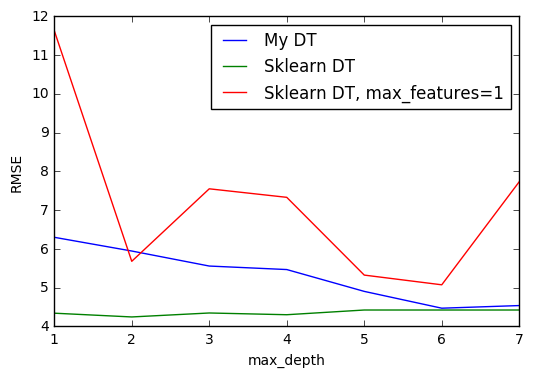

In [295]:
plt.plot(range(1, 8), my_rmse, label='My DT')
plt.plot(range(1, 8), sk1_rmse, label='Sklearn DT')
plt.plot(range(1, 8), sk2_rmse, label='Sklearn DT, max_features=1')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(loc='upper right')
plt.show()